In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

## Data

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

### Getting the data

In [21]:

! kaggle datasets download -d meirnizri/covid19-dataset --force

zipref = zipfile.ZipFile("/content/covid19-dataset.zip")
zipref.extractall()
zipref.close()

 86% 4.00M/4.66M [00:01<00:00, 4.70MB/s]
100% 4.66M/4.66M [00:01<00:00, 3.87MB/s]


In [22]:
df = pd.read_csv('Covid Data.csv')
print(df.shape)

(1048575, 21)


In [23]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [25]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [26]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

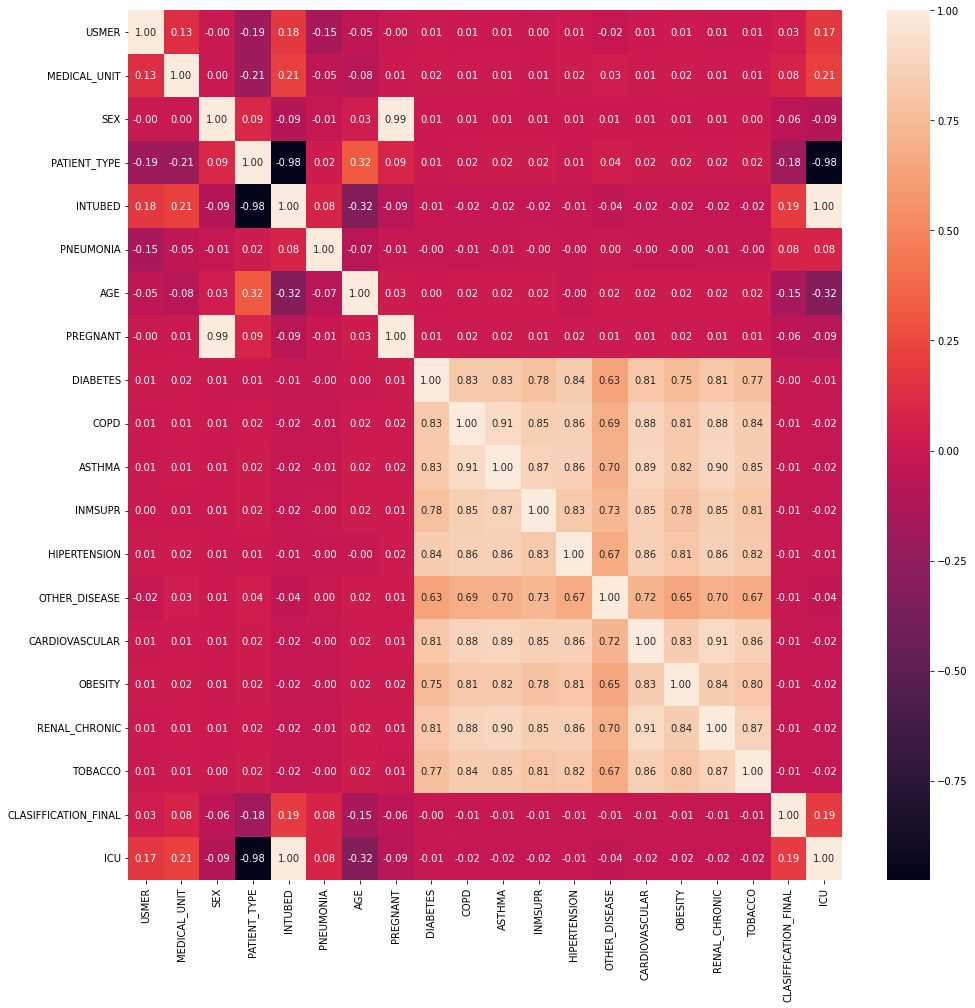

In [27]:
import seaborn as sns
plt.figure(figsize=(16,16))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f");

In [28]:
for i in df.columns:
  print(f"Column {i} unique values:\n")
  print(df[i].unique())
  print("\n --------------------- \n")


Column USMER unique values:

[2 1]

 --------------------- 

Column MEDICAL_UNIT unique values:

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]

 --------------------- 

Column SEX unique values:

[1 2]

 --------------------- 

Column PATIENT_TYPE unique values:

[1 2]

 --------------------- 

Column DATE_DIED unique values:

['03/05/2020' '03/06/2020' '09/06/2020' '12/06/2020' '21/06/2020'
 '9999-99-99' '26/02/2020' '05/04/2020' '08/05/2020' '20/05/2020'
 '17/07/2020' '13/01/2020' '22/01/2020' '29/01/2020' '13/02/2020'
 '18/02/2020' '19/02/2020' '20/02/2020' '24/02/2020' '04/03/2020'
 '07/03/2020' '12/03/2020' '14/03/2020' '18/03/2020' '27/03/2020'
 '28/03/2020' '29/03/2020' '02/04/2020' '06/04/2020' '07/04/2020'
 '08/04/2020' '09/04/2020' '10/04/2020' '11/04/2020' '12/04/2020'
 '13/04/2020' '14/04/2020' '15/04/2020' '16/04/2020' '17/04/2020'
 '18/04/2020' '20/04/2020' '21/04/2020' '22/04/2020' '23/04/2020'
 '24/04/2020' '25/04/2020' '26/04/2020' '27/04/2020' '28/04/2020'
 '29/04/2020' '3

### Changes in data
Drop INTUBED and ICU this columns have high correlaction with PATIENT_TYPE as we will use only PATIENT_TYPE

From Diseases we will choose this that can cause death or with COVID lead to it:
- COPD
- ASTHMA
- RENTAL_CHRONIC
- TABACCO

Split columns: 
- DATE_DIED into Living where:
  - '1' will be if is alived,
  - '0' if is dead
- Pregnant into is_pregnant and cap_pregnancy(capability for pregnancy):
  - is_pregnant '1' if is and '0' otherwise
  - cap_pregnancy '1' if is and '0' otherwise

Changes in data:
- Set all 1 -> '0' and 2 -> '0' for convenience
- Set all missing data to into is_{} and set value to either '1' if there is data and '0' otherwise.


In [29]:
df = pd.read_csv('Covid Data.csv')

df["Living"] = [1 if i =="9999-99-99" else 0 for i in df['DATE_DIED']]

df["is_PREGNANT"] = [1 if i == 2 else 0 for i in df["PREGNANT"]]
df["cap_pregnant"] = [0 if (i==97 or i==98) else 1 for i in df["PREGNANT"]]

df["is_PNEUMONIA"] = [0 if i==99 else 1 for i in df["PNEUMONIA"]]
df["PNEUMONIA"] = [1 if i==2 else 0 for i in df["PNEUMONIA"]]

df["is_COPD"] = [0 if i==98 else 1 for i in df["COPD"]]#
df["COPD"] = [1 if i==2 else 0 for i in df["COPD"]]

df["is_ASTHMA"] = [0 if i==98 else 1 for i in df["ASTHMA"]]#
df["ASTHMA"] = [1 if i==2 else 0 for i in df["ASTHMA"]]

df["is_RENAL_CHRONIC"] = [0 if i==98 else 1 for i in df["RENAL_CHRONIC"]]#
df["RENAL_CHRONIC"] = [1 if i==2 else 0 for i in df["RENAL_CHRONIC"]]

df["is_TOBACCO"] = [0 if i==98 else 1 for i in df["TOBACCO"]]
df["TOBACCO"] = [1 if i==2 else 0 for i in df["TOBACCO"]]#

df["SEX"] = [1 if i==2 else 0 for i in df["SEX"]]


df = df.drop("DATE_DIED", axis=1)
df = df.drop("PREGNANT", axis=1)
df = df.drop("INMSUPR", axis=1)
df = df.drop("DIABETES", axis=1)
df = df.drop("HIPERTENSION", axis=1)
df = df.drop("OTHER_DISEASE", axis=1)
df = df.drop("CARDIOVASCULAR", axis=1)
df = df.drop("OBESITY", axis=1)
df = df.drop("ICU", axis=1)
df = df.drop("INTUBED", axis=1)

In [30]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,COPD,ASTHMA,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Living,is_PREGNANT,cap_pregnant,is_PNEUMONIA,is_COPD,is_ASTHMA,is_RENAL_CHRONIC,is_TOBACCO
0,2,1,0,1,0,65,1,1,1,1,3,0,1,1,1,1,1,1,1
1,2,1,1,1,0,72,1,1,0,1,5,0,0,0,1,1,1,1,1
2,2,1,1,2,1,55,1,1,1,1,3,0,0,0,1,1,1,1,1
3,2,1,0,1,1,53,1,1,1,1,7,0,1,1,1,1,1,1,1
4,2,1,1,1,1,68,1,1,1,1,3,0,0,0,1,1,1,1,1


### Wizualizacja danych

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Living bar')

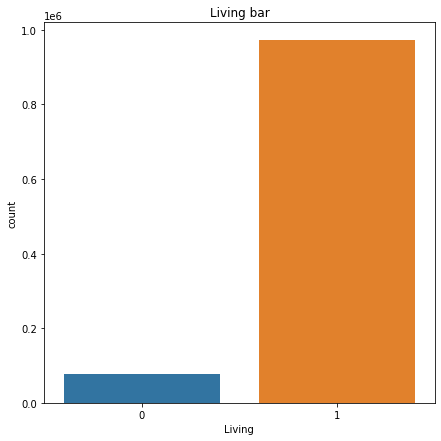

In [31]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
ax = sns.countplot(df.Living)
ax.set_title("Living bar")


Text(0.5, 1.0, 'Age distribution')

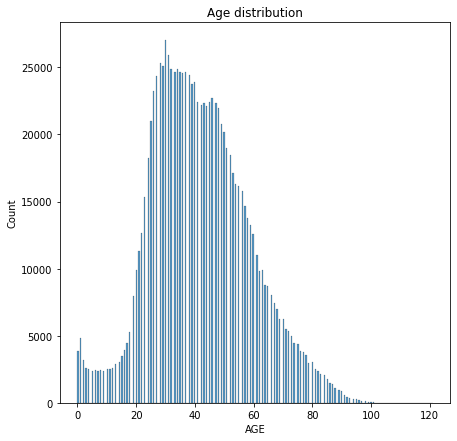

In [32]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
ax = sns.histplot(x=df.AGE)
ax.set_title("Age distribution")


## ML Model with label value as Death_prediction

In [33]:
def plot_history(history):
  '''
  Takes history of our model and plot accuracy and loss function

  parms:
  history - model history

  output:
  -
  '''
  loss = history.history["loss"]
  acc = history.history["accuracy"]
  number_of_elements = len(loss)
  epochs = np.linspace(1,number_of_elements,number_of_elements)

  ## Plotting functions
  fig,ax = plt.subplots(2,1, figsize=(10,7))
  ax[0].plot(epochs, acc)
  ax[0].set_title("Accuracy")  
  ax[1].plot(epochs, loss)
  ax[1].set_title("Loss function")
  plt.show()


from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculating model accurancy, precision, recall and f1 score
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  ## Calculate model precision
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  
  model_results = {"accuracy": model_accuracy,
                   "precision":model_precision * 100,
                   "recall":model_recall * 100,
                   "f1":model_f1 * 100}

  return model_results

In [34]:
X = df.drop("Living", axis=1)
y = df.Living
X.shape,y.shape

((1048575, 18), (1048575,))

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [37]:
## Simple model
import tensorflow as tf
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)


model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
]) 

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(X_train, y_train,epochs=10)

Epoch 1/10
26215/26215 [==============================] - 83s 3ms/step - loss: 0.1344 - accuracy: 0.9366
Epoch 2/10
26215/26215 [==============================] - 82s 3ms/step - loss: 0.1298 - accuracy: 0.9381
Epoch 3/10
26215/26215 [==============================] - 84s 3ms/step - loss: 0.1289 - accuracy: 0.9385
Epoch 4/10
26215/26215 [==============================] - 83s 3ms/step - loss: 0.1283 - accuracy: 0.9389
Epoch 5/10
26215/26215 [==============================] - 82s 3ms/step - loss: 0.1280 - accuracy: 0.9391
Epoch 6/10
26215/26215 [==============================] - 84s 3ms/step - loss: 0.1276 - accuracy: 0.9392
Epoch 7/10
26215/26215 [==============================] - 83s 3ms/step - loss: 0.1275 - accuracy: 0.9390
Epoch 8/10
26215/26215 [==============================] - 83s 3ms/step - loss: 0.1273 - accuracy: 0.9392
Epoch 9/10
26215/26215 [==============================] - 82s 3ms/step - loss: 0.1272 - accuracy: 0.9394
Epoch 10/10
26215/26215 [==============================

In [ ]:
model_1.summary()

In [ ]:
plot_history(history_1)

In [ ]:
val_pred = model_1.predict(X_test)
model_1_preds = tf.squeeze(tf.round(val_pred))
model_1_results = calculate_results(y_true=y_test,
                                    y_pred=model_1_preds)
model_1_results

### Calculate the time our model need to process all the data

In [ ]:
import time
def pred_timer(model, samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred


In [ ]:
X = tf.convert_to_tensor(X)
time_total_1, time_per_pred_1 = pred_timer(model_1, X)
time_total_1,time_per_pred_1

## Experiment add all diseases and compile the same model with new data
Still exclude INTUNED and ICU for there have high correlaction with PATIENT_TYPE

In [ ]:
df = pd.read_csv('Covid Data.csv')

df["Living"] = [1 if i =="9999-99-99" else 0 for i in df['DATE_DIED']]

df["is_PREGNANT"] = [1 if i == 2 else 0 for i in df["PREGNANT"]]
df["cap_pregnant"] = [0 if (i==97 or i==98) else 1 for i in df["PREGNANT"]]

df["is_PNEUMONIA"] = [0 if i==99 else 1 for i in df["PNEUMONIA"]]
df["PNEUMONIA"] = [1 if i==2 else 0 for i in df["PNEUMONIA"]]

df["is_COPD"] = [0 if i==98 else 1 for i in df["COPD"]]#
df["COPD"] = [1 if i==2 else 0 for i in df["COPD"]]

df["is_ASTHMA"] = [0 if i==98 else 1 for i in df["ASTHMA"]]#
df["ASTHMA"] = [1 if i==2 else 0 for i in df["ASTHMA"]]

df["is_RENAL_CHRONIC"] = [0 if i==98 else 1 for i in df["RENAL_CHRONIC"]]#
df["RENAL_CHRONIC"] = [1 if i==2 else 0 for i in df["RENAL_CHRONIC"]]

df["is_TOBACCO"] = [0 if i==98 else 1 for i in df["TOBACCO"]]
df["TOBACCO"] = [1 if i==2 else 0 for i in df["TOBACCO"]]#

df["SEX"] = [1 if i==2 else 0 for i in df["SEX"]]


df["is_DIABETES"] = [0 if i==98 else 1 for i in df["DIABETES"]]
df["DIABETES"] = [1 if i==2 else 0 for i in df["DIABETES"]]
df["is_HIPERTENSION"] = [0 if i==98 else 1 for i in df["HIPERTENSION"]]
df["HIPERTENSION"] = [1 if i==2 else 0 for i in df["HIPERTENSION"]]
df["is_INTUBED"] = [0 if (i==97 or i==99) else 1 for i in df["INTUBED"]]
df["INTUBED"] = [1 if i==2 else 0 for i in df["INTUBED"]]
df["is_OTHER_DISEASE"] = [0 if i==98 else 1 for i in df["OTHER_DISEASE"]]
df["OTHER_DISEASE"] = [1 if i==2 else 0 for i in df["OTHER_DISEASE"]]
df["is_CARDIOVASCULAR"] = [0 if i==98 else 1 for i in df["CARDIOVASCULAR"]]
df["CARDIOVASCULAR"] = [1 if i==2 else 0 for i in df["CARDIOVASCULAR"]]
df["is_OBESITY"] = [0 if i==98 else 1 for i in df["OBESITY"]]
df["OBESITY"] = [1 if i==2 else 0 for i in df["OBESITY"]]

df = df.drop("DATE_DIED", axis=1)
df = df.drop("PREGNANT", axis=1)
df = df.drop("INMSUPR", axis=1)
df = df.drop("ICU", axis=1)
df = df.drop("INTUBED", axis=1)

In [ ]:
X = df.drop("Living", axis=1)
y = df.Living

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)


model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
]) 

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(X_train, y_train,epochs=10)

In [ ]:
plot_history(history_2)

In [ ]:
val_pred = model_2.predict(X_test)
model_2_preds = tf.squeeze(tf.round(val_pred))
model_2_results = calculate_results(y_true=y_test,
                                    y_pred=model_2_preds)
model_2_results

In [ ]:
X = tf.convert_to_tensor(X)
time_total_2, time_per_pred_2 = pred_timer(model_2, X)
time_total_2,time_per_pred_2

### Model with added diseases dont work better than with smaller number of diseases

## Building model that will not include any diseases

In [ ]:
df = pd.read_csv('Covid Data.csv')

df["Living"] = [1 if i =="9999-99-99" else 0 for i in df['DATE_DIED']]

df["is_PREGNANT"] = [1 if i == 2 else 0 for i in df["PREGNANT"]]
df["cap_pregnant"] = [0 if (i==97 or i==98) else 1 for i in df["PREGNANT"]]
df["is_TOBACCO"] = [0 if i==98 else 1 for i in df["TOBACCO"]]
df["TOBACCO"] = [1 if i==2 else 0 for i in df["TOBACCO"]]#

df["SEX"] = [1 if i==2 else 0 for i in df["SEX"]]


df = df.drop("PNEUMONIA",axis=1)
df = df.drop("COPD",axis=1)
df = df.drop("RENAL_CHRONIC",axis=1)
df = df.drop("DATE_DIED", axis=1)
df = df.drop("PREGNANT", axis=1)
df = df.drop("INMSUPR", axis=1)
df = df.drop("DIABETES", axis=1)
df = df.drop("HIPERTENSION", axis=1)
df = df.drop("OTHER_DISEASE", axis=1)
df = df.drop("CARDIOVASCULAR", axis=1)
df = df.drop("OBESITY", axis=1)
df = df.drop("ICU", axis=1)
df = df.drop("INTUBED", axis=1)

In [ ]:
X = df.drop("Living", axis=1)
y = df.Living

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)


model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
]) 

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train,epochs=10)

In [ ]:
plot_history(history_3)

In [ ]:
val_pred = model_3.predict(X_test)
model_3_preds = tf.squeeze(tf.round(val_pred))
model_3_results = calculate_results(y_true=y_test,
                                    y_pred=model_3_preds)
model_3_results

In [ ]:
X = tf.convert_to_tensor(X)
time_total_3, time_per_pred_3 = pred_timer(model_3, X)
time_total_3,time_per_pred_3

## Summary

In [ ]:
data = {"Model_1": [np.round(model_1_results["accuracy"],2), time_total_1, 1e6*time_per_pred_1], 
        "Model_2": [np.round(model_2_results["accuracy"],2), time_total_2, 1e6*time_per_pred_2], 
        "Model_3": [np.round(model_3_results["accuracy"],2), time_total_3, 1e6*time_per_pred_3]}
results = pd.DataFrame(data=data, index=["Accuracy [%]",  "Time_dataset [s]","Time_per_sample [10^-6 s]"])

In [ ]:
results.T

### Model 2 have the fastest time for predicting the sample, all model accuracy have nearly the same value, so in conclusion diseases don't have much value in predicting the right label, but it helps our model work faster.